<h1>Preporcessing Breaking News Dataset

#Imports

In [ ]:
%%capture
!pip install -U "tensorflow-text"

In [ ]:
!pip install "tf-models-official"

  Using cached tf_models_official-2.16.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached Cython-3.0.10-cp39-cp39-win_amd64.whl.metadata (3.2 kB)
  Using cached pillow-10.3.0-cp39-cp39-win_amd64.whl.metadata (9.4 kB)
  Using cached gin_config-0.5.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached google_api_python_client-2.127.0-py2.py3-none-any.whl.metadata (6.7 kB)
  Using cached immutabledict-4.2.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached kaggle-1.6.12-py3-none-any.whl
  Using cached matplotlib-3.8.4-cp39-cp39-win_amd64.whl.metadata (5.9 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached pandas-2.2.2-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached pycocotools-2.0.7-cp39-cp39-win_amd64.whl.metadata (1.1 kB)
  Using cached sacrebleu-2.4.2-py3-none-any.whl.metadata (5

  You can safely remove it manually.


In [ ]:
%%capture
!pip install wordcloud

In [ ]:
!pip install protobuf

In [ ]:
%%capture
!pip install spacy

In [ ]:
%%capture
!pip install nltk

In [ ]:
%%capture
!pip install seaborn

In [ ]:
%%capture
!pip install unidecode

In [ ]:
%%capture
!pip install truecase

In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

D:\New folder (3)\envs\new_env_final5\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
D:\New folder (3)\envs\new_env_final5\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
I

In [ ]:

import tensorflow as tf
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
import re

In [ ]:
%%capture
"""Necessary imports"""

import unidecode

#import the required packages
import requests
from bs4 import BeautifulSoup
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize

import spacy, re
from truecase import get_true_case
import nltk
#nltk.download('punkt')
#nlp = spacy.load('en_core_web_sm')

In [ ]:
%%capture
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\emadt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emadt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\emadt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading the data and exploring


In [ ]:
"""The data has four unwanted columns as we only need two; tweet and target columns"""
data = pd.read_csv("FinalBN27-4.csv")
data.head()


,news,label,cleaned_news
0,Israeli attacks kill 63 Palestinians on the fi...,Breaking_News,israeli attacks kill 63 palestinians on the fi...
1,Israeli army spokesperson Daniel Hagari confir...,Breaking_News,israeli army spokesperson daniel hagari confir...
2,Progress has been made in Gaza's truce talks w...,Breaking_News,progress has been made in gaza's truce talks w...
3,The UN Human Rights Council has adopted a reso...,Breaking_News,the un human rights council has adopted a reso...
4,Al Jazeera: Netanyahu's statements are lies th...,Breaking_News,al jazeera netanyahu's statements are lies tha...


In [ ]:
#dropping unwanted columns
data=data.drop(['news'], axis=1)

In [ ]:
data

,label,cleaned_news
0,Breaking_News,israeli attacks kill 63 palestinians on the fi...
1,Breaking_News,israeli army spokesperson daniel hagari confir...
2,Breaking_News,progress has been made in gaza's truce talks w...
3,Breaking_News,the un human rights council has adopted a reso...
4,Breaking_News,al jazeera netanyahu's statements are lies tha...
...,...,...
8238,Non_Breaking_News,the u.s. could ban tiktok. these countries hav...
8239,Non_Breaking_News,"tesla profit plunges on price cuts, but compan..."
8240,Non_Breaking_News,google fires more workers after ceo says workp...
8241,Non_Breaking_News,dating apps are collecting more of your inform...


In [ ]:
#putting all labels into a variable this is to manually filter out the urgent and not urgent ones
d=data['label'].unique()
#there are 45 different labels and we want them to be only 2
display(d.shape)
#final data
data.head()

(2,)

,label,cleaned_news
0,Breaking_News,israeli attacks kill 63 palestinians on the fi...
1,Breaking_News,israeli army spokesperson daniel hagari confir...
2,Breaking_News,progress has been made in gaza's truce talks w...
3,Breaking_News,the un human rights council has adopted a reso...
4,Breaking_News,al jazeera netanyahu's statements are lies tha...


In [ ]:
#droppimg any nulls
data = data.dropna(how='any',axis=0)
data.head()

,label,cleaned_news
0,Breaking_News,israeli attacks kill 63 palestinians on the fi...
1,Breaking_News,israeli army spokesperson daniel hagari confir...
2,Breaking_News,progress has been made in gaza's truce talks w...
3,Breaking_News,the un human rights council has adopted a reso...
4,Breaking_News,al jazeera netanyahu's statements are lies tha...


In [ ]:
#Checking if there are any null values
data.isnull().values.any()

False

<h4>Transforming labels to Breaking News and Non Breaking News

In [ ]:
display(data.label.unique().size)  #45 different labels to be only 2
d #all the labels

2

array(['Breaking_News', 'Non_Breaking_News'], dtype=object)

In [ ]:
data.describe()

,label,cleaned_news
count,8243,8243
unique,2,8218
top,Breaking_News,the most inspiring people and places of my 202...
freq,4912,13


#Visualizing the dataset

In [ ]:
# check for duplicate values in tweet column
duplicate_values = data['cleaned_news'].duplicated().sum()
print(duplicate_values)

"""there are 1154 duplicate values so we had to drop them"""

25


'there are 1154 duplicate values so we had to drop them'

In [ ]:
#drop the duplicate values
data = data.drop_duplicates(subset=['cleaned_news'], keep='first')
data.head()

,label,cleaned_news
0,Breaking_News,israeli attacks kill 63 palestinians on the fi...
1,Breaking_News,israeli army spokesperson daniel hagari confir...
2,Breaking_News,progress has been made in gaza's truce talks w...
3,Breaking_News,the un human rights council has adopted a reso...
4,Breaking_News,al jazeera netanyahu's statements are lies tha...


In [ ]:
# check for duplicate values in tweet column again after dropping
duplicate_values = data['cleaned_news'].duplicated().sum()
print(duplicate_values)

0


In [ ]:
#Putting each column in their respected variable
tweet = data['cleaned_news']
label = data['label']
#bt2aked en both columns have same amount values
print(data['label'].size)
data['cleaned_news'].size

8218


8218

In [ ]:
data.label.unique()

array(['Breaking_News', 'Non_Breaking_News'], dtype=object)

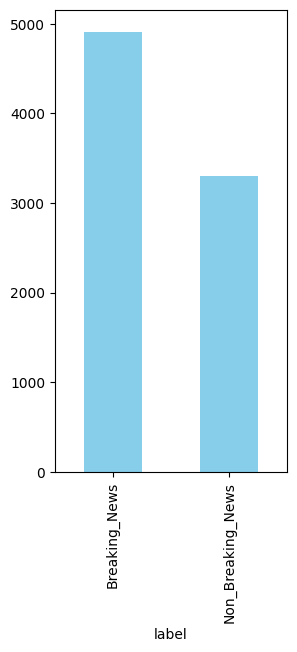

In [ ]:
"""the below bar chart shows that the class urgent is way less than the class "not_urgent" which
causes the data to be imbalanced"""

#bar chart to display the class disributions
count = data['label'].value_counts().plot(figsize=(3, 6),kind="bar", color="skyblue")

In [ ]:
#class distribution
label.value_counts()

label
Breaking_News        4911
Non_Breaking_News    3307
Name: count, dtype: int64

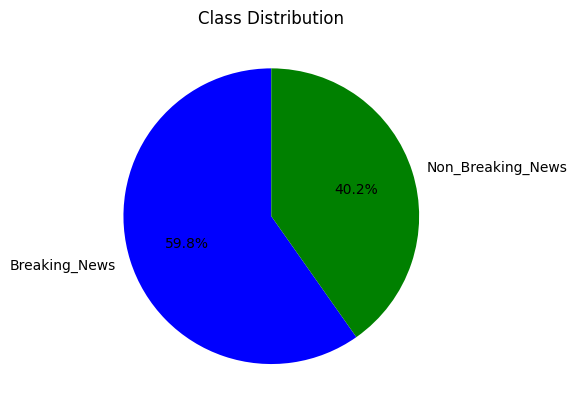

In [ ]:
#Counting occurrences of each class
class_counts = data['label'].value_counts()

#Creating a pie chart
colors = ['blue', 'green']
labels = class_counts.index
plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.show()


The following preprocessing will be on the dalanced dataset, using the variables **balanced_df, balanced_tweet, balanced_label**

In [ ]:
""" I will be using the balanced dataset by calling the variables
          balanced_df
          balanced_tweet
          balanced_label """

' I will be using the balanced dataset by calling the variables\n          balanced_df\n          balanced_tweet\n          balanced_label '

#Cleaning

In [ ]:
# Function to remove usernames and mentions from a tweet
def remove_usernames_mentions(tweet):
    cleaned_tweet = re.sub(r'@\w+', '', tweet)
    return cleaned_tweet

In [ ]:
def clean_tweet(tweet):
    tweet = re.sub(r'#\w+', '', tweet)
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet) #Remove special characters and numbers
    tweet = re.sub(r"[!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n -' ]"," ",tweet)
    tweet = unidecode.unidecode(tweet) #removes emojis
    tweet = tweet.lower() #Convert to lowercase
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet =  re.sub(r'@[\w]+', '',tweet)                     # remove twitter handles
    #tweet = re.sub(r'@\S+', '', tweet)
    tweet =  re.sub(r'pic.\S+', '',tweet)
    tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', tweet+' ')      # keep words with length>1 only
    tweet =  re.sub(r'http\S+', '',tweet)                  # remove urls
    #cleaned_text = ' '.join(tweet)
    return  " ".join(tweet.split()) #remove white spaces

#Expanding, removing slang and informal abbrevations

Fixing slang and informal abbrevations

this function somehow misses the whole thing

In [ ]:
""" EXPANDING CONTRACTIONS """
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have",
                      "$" : " dollar ", "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait", "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired",
    "rt" : "right",
    "nepalearthquake": 'Nepal earthquake',
    'nepalquake': 'Nepal earthquake',
                      'aka':'also known as',
                      'dont':'do not'}

# Regular expression for finding contractions
contractions_re = re.compile(r'\b(%s)\b' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        contraction = match.group(0)
        # Check if the contraction exists in the dictionary before accessing it
        return contractions_dict.get(contraction, contraction)

    return contractions_re.sub(replace, text)


## **Truecasing**

In [ ]:
def truecase_tweet(tweet):
    # Process the input tweet using spaCy
    doc = nlp(tweet)

    # Extract the word and its part-of-speech (POS) tag for each token in the processed text
    tagged_sent = [(w.text, w.tag_) for w in doc]

    # Normalize the sentence by capitalizing nouns (NN and NNS)
    normalized_sent = [w.capitalize() if t in ["NN", "NNS"] else w for (w, t) in tagged_sent]

    # Join the normalized words into a string and remove unnecessary spaces before punctuation
    normalized_string = re.sub(" (?=[\.,'!?:;])", "", ' '.join(normalized_sent))

    # Apply truecasing to the normalized string
    truecased_string = get_true_case(normalized_string)

    return truecased_string

#Implementing all functions

In [ ]:
data['cleaned_tweet'] = data['cleaned_news'].apply(remove_usernames_mentions)
data.head(10)

data['cleaned_tweet'] = data['cleaned_tweet'].apply(clean_tweet)
data.head(10)

,label,cleaned_news,cleaned_tweet
0,Breaking_News,israeli attacks kill 63 palestinians on the fi...,israeli attacks kill palestinians on the first...
1,Breaking_News,israeli army spokesperson daniel hagari confir...,israeli army spokesperson daniel hagari confir...
2,Breaking_News,progress has been made in gaza's truce talks w...,progress has been made in gazas truce talks wi...
3,Breaking_News,the un human rights council has adopted a reso...,the un human rights council has adopted resolu...
4,Breaking_News,al jazeera netanyahu's statements are lies tha...,al jazeera netanyahus statements are lies that...
5,Breaking_News,israeli parliament passes law paving the way f...,israeli parliament passes law paving the way f...
6,Breaking_News,israeli pm benjamin netanyahu is reviving a pu...,israeli pm benjamin netanyahu is reviving push...
7,Breaking_News,a pakistani court has suspended former pm imra...,a pakistani court has suspended former pm imra...
8,Breaking_News,uk court rules wikileaks founder julian assang...,uk court rules wikileaks founder julian assang...
9,Breaking_News,five chinese nationals have been killed in an ...,five chinese nationals have been killed in an ...


In [ ]:
# Expanding Contractions in the reviews
data['cleaned_tweet'] = data['cleaned_tweet'].apply(lambda x: expand_contractions(x))
data.head(5)

,label,cleaned_news,cleaned_tweet
0,Breaking_News,israeli attacks kill 63 palestinians on the fi...,israeli attacks kill palestinians on the first...
1,Breaking_News,israeli army spokesperson daniel hagari confir...,israeli army spokesperson daniel hagari confir...
2,Breaking_News,progress has been made in gaza's truce talks w...,progress has been made in gazas truce talks wi...
3,Breaking_News,the un human rights council has adopted a reso...,the un human rights council has adopted resolu...
4,Breaking_News,al jazeera netanyahu's statements are lies tha...,al jazeera netanyahus statements are lies that...


In [ ]:
# Apply truecasing to all tweets in the "tweet" column
data['cleaned_tweet'] = data['cleaned_tweet'].apply(truecase_tweet)


data.head(5)

,label,cleaned_news,cleaned_tweet
0,Breaking_News,israeli attacks kill 63 palestinians on the fi...,Israeli attacks kill Palestinians on the first...
1,Breaking_News,israeli army spokesperson daniel hagari confir...,Israeli Army spokesperson Daniel Hagari CONFIR...
2,Breaking_News,progress has been made in gaza's truce talks w...,Progress has been made in Gazas truce talks wi...
3,Breaking_News,the un human rights council has adopted a reso...,The UN human rights Council has adopted resolu...
4,Breaking_News,al jazeera netanyahu's statements are lies tha...,Al Jazeera Netanyahus statements are lies that...


## EDA

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import string

In [ ]:
#initial Tokenization for EDA purposes
data['cleanedTokens'] = data['cleaned_tweet'].apply(word_tokenize)

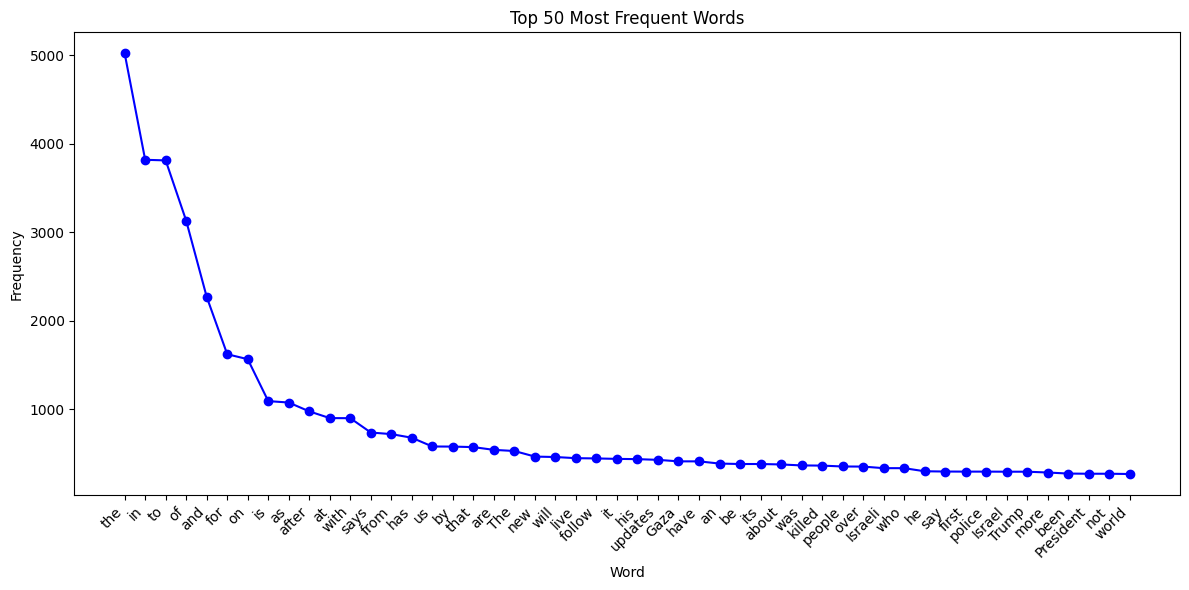

In [ ]:
# Flatten the list of processed words
all_words = [word for sublist in data['cleanedTokens'] for word in sublist]

# Get the 50 most frequent words
word_freq = Counter(all_words)
top_words = word_freq.most_common(50)

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(*zip(*top_words), marker='o', linestyle='-', color='b')
plt.title('Top 50 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#stop word removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emadt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop = list(STOPWORDS) + list('0123456789') + ['rt', 'amp', 'us', 'will', 'via', 'dont', 'cant', 'u', 'work', 'im', 'rubyph',
                               'got', 'back', 'first', 'one', 'two', 'know', 'going', 'time', 'go', 'may', 'youtube', 'say', 'day', 'love',
                               'still', 'see', 'watch', 'make', 'think', 'even', 'right', 'left', 'take', 'want', 'http', 'https', 'co','typhoon',
                               'hagupit']

In [ ]:
data['cleaned_tweet'] = data['cleaned_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
data.head(2)

,label,cleaned_news,cleaned_tweet,cleanedTokens
0,Breaking_News,israeli attacks kill 63 palestinians on the fi...,Israeli attacks kill Palestinians Eid besieged...,"[Israeli, attacks, kill, Palestinians, on, the..."
1,Breaking_News,israeli army spokesperson daniel hagari confir...,Israeli Army spokesperson Daniel Hagari CONFIR...,"[Israeli, Army, spokesperson, Daniel, Hagari, ..."


In [ ]:
#Toekized the un stop words column
data['cleanedTokens2'] = data['cleaned_tweet'].apply(word_tokenize)

In [ ]:
data.head(2)

,label,cleaned_news,cleaned_tweet,cleanedTokens,cleanedTokens2
0,Breaking_News,israeli attacks kill 63 palestinians on the fi...,Israeli attacks kill Palestinians Eid besieged...,"[Israeli, attacks, kill, Palestinians, on, the...","[Israeli, attacks, kill, Palestinians, Eid, be..."
1,Breaking_News,israeli army spokesperson daniel hagari confir...,Israeli Army spokesperson Daniel Hagari CONFIR...,"[Israeli, Army, spokesperson, Daniel, Hagari, ...","[Israeli, Army, spokesperson, Daniel, Hagari, ..."


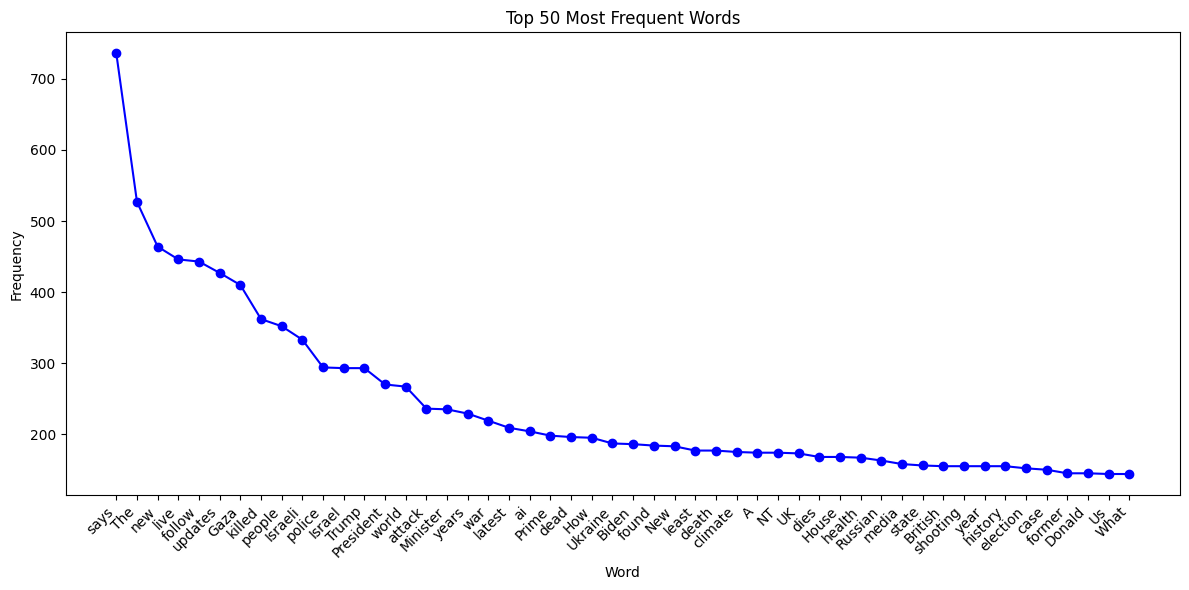

In [ ]:
# Flattening
all_words = [word for sublist in data['cleanedTokens2'] for word in sublist]

# getting the 50 most frequent words
word_freq = Counter(all_words)
top_words = word_freq.most_common(50)

# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(*zip(*top_words), marker='o', linestyle='-', color='b')
plt.title('Top 50 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
data = data.drop(['cleanedTokens','cleanedTokens2'], axis=1)

In [ ]:
data.head(2)

,label,cleaned_news,cleaned_tweet
0,Breaking_News,israeli attacks kill 63 palestinians on the fi...,Israeli attacks kill Palestinians Eid besieged...
1,Breaking_News,israeli army spokesperson daniel hagari confir...,Israeli Army spokesperson Daniel Hagari CONFIR...


In [ ]:
# Thanks to https://www.kaggle.com/vbmokin/nlp-with-dt-simple-transformers-research
def plot_word_cloud(x, col, num_common_words, stop_words):
    # Building the WordCloud for the num_common_words most common data in x[col] without words from list stop_words

    # Calculation common words
    corpus = " ".join(x[col].str.lower())
    punc_str = string.punctuation.replace("'","")
    corpus = corpus.translate(str.maketrans('', '', punc_str))
    corpus_without_stopwords = [word for word in corpus.split() if word not in stop_words]
    common_words = Counter(corpus_without_stopwords).most_common(num_common_words)

    # Build Word Cloud
    plt.figure(figsize=(12,8))
    word_cloud = WordCloud(stopwords = stop_words,
                           background_color='black',
                           max_font_size = 80
                           ).generate(" ".join(corpus_without_stopwords))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()

    return common_words

Word Cloud for training data without stopwords


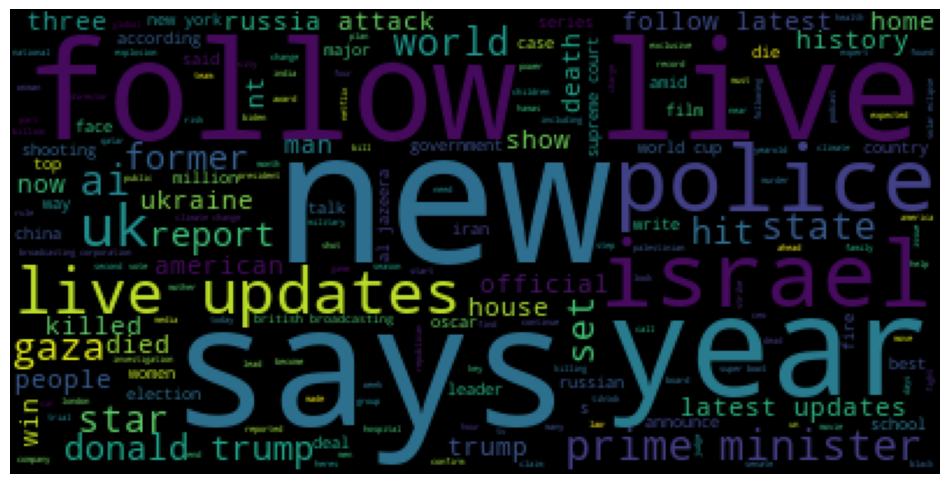

[('says', 739),
 ('new', 647),
 ('live', 451),
 ('follow', 445),
 ('updates', 427),
 ('gaza', 410),
 ('killed', 366),
 ('people', 363),
 ('police', 350),
 ('israeli', 333)]

In [ ]:
print('Word Cloud for training data without stopwords')
plot_word_cloud(data, 'cleaned_tweet', 10, stop)

#Exploring the cleaned data

In [ ]:
for index,text in enumerate(data['cleaned_tweet'][30:44]):
  print('text %d:\n'%(index+1),text)

text 1:
 What happened hind Rajab Yearold girl Gaza trapped car surrounded dead relatives satellite imagery Indepth analysis shed new light Hinds terrifying ordeal killed along medics sent save
text 2:
 Houthis claim attack British ship called Lycavitos appropriate naval missiles sailing Gulf Aden
text 3:
 At least four people killed including children Israeli air attacks towns Southern Lebanon according Lebanons civil defence
text 4:
 Heavy shelling reported areas surrounding Kuwaiti hospital Southern Gazas Rafah
text 5:
 Death toll besieged Gaza strip Surpasses Palestinians
text 6:
 Palestinian Yearold killed Israeli forces occupied West bank says Palestinian Ministry health
text 7:
 Two Palestinian men besieged Israeli soldiers house Nur shams refugee camp killed says red crescent
text 8:
 Saudi Arabias Ministry foreign affairs issues statement talks regarding Arabisraeli peace process stating diplomatic ties Israel without independent Palestinian state
text 9:
 Hamas CONFIRMS posit

In [ ]:
for index,text in enumerate(data['cleaned_news'][30:44]):
  print('text %d:\n'%(index+1),text)

text 1:
 what happened to hind rajab, the 6yearold girl in gaza trapped in a car surrounded by her dead relatives? through satellite imagery and indepth analysis, we shed new light on hind's terrifying ordeal and how she was killed along with the medics sent to save her.
text 2:
 houthis claim attack on british ship called lycavitos with appropriate naval missiles as it was sailing in the gulf of aden.
text 3:
 at least four people killed, including two children, in two israeli air attacks on towns in southern lebanon, according to lebanons civil defence.
text 4:
 heavy shelling has been reported in the areas surrounding the kuwaiti hospital in southern gaza's rafah.
text 5:
 death toll in the besieged gaza strip surpasses 28,000 palestinians.
text 6:
 palestinian 17yearold killed by israeli forces in the occupied west bank, says palestinian ministry of health.
text 7:
 two palestinian men who were besieged by israeli soldiers in a house in nur shams refugee camp have been killed, says




#BERT


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.layers import TextVectorization
from keras.optimizers import Adam

In [ ]:
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Dropout
import pandas as pd

In [ ]:
"""The data has four unwanted columns as we only need two; tweet and target columns"""
data = pd.read_csv("FinalBN27-4.csv")
data.head()


,news,label,cleaned_news
0,Israeli attacks kill 63 Palestinians on the fi...,Breaking_News,israeli attacks kill 63 palestinians on the fi...
1,Israeli army spokesperson Daniel Hagari confir...,Breaking_News,israeli army spokesperson daniel hagari confir...
2,Progress has been made in Gaza's truce talks w...,Breaking_News,progress has been made in gaza's truce talks w...
3,The UN Human Rights Council has adopted a reso...,Breaking_News,the un human rights council has adopted a reso...
4,Al Jazeera: Netanyahu's statements are lies th...,Breaking_News,al jazeera netanyahu's statements are lies tha...


In [ ]:
#dropping unwanted columns
data=data.drop(['news'], axis=1)

In [ ]:
data

,label,cleaned_news
0,Breaking_News,israeli attacks kill 63 palestinians on the fi...
1,Breaking_News,israeli army spokesperson daniel hagari confir...
2,Breaking_News,progress has been made in gaza's truce talks w...
3,Breaking_News,the un human rights council has adopted a reso...
4,Breaking_News,al jazeera netanyahu's statements are lies tha...
...,...,...
8238,Non_Breaking_News,the u.s. could ban tiktok. these countries hav...
8239,Non_Breaking_News,"tesla profit plunges on price cuts, but compan..."
8240,Non_Breaking_News,google fires more workers after ceo says workp...
8241,Non_Breaking_News,dating apps are collecting more of your inform...


In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'small_bert/bert_en_uncased_L-6_H-512_A-8'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
label_mapping = {'Breaking_News': 1, 'Non_Breaking_News': 0}
# Create a new column 'label_num' based on the mapping
data['label_num'] = data['label'].map(label_mapping)
data['label_num'] = data['label_num'].astype(int)
print(data.head())

           label                                       cleaned_news  label_num
0  Breaking_News  israeli attacks kill 63 palestinians on the fi...          1
1  Breaking_News  israeli army spokesperson daniel hagari confir...          1
2  Breaking_News  progress has been made in gaza's truce talks w...          1
3  Breaking_News  the un human rights council has adopted a reso...          1
4  Breaking_News  al jazeera netanyahu's statements are lies tha...          1


In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
#data=data.drop(['cleaned_news','label'], axis=1)

data['label_num'] = data['label_num'].astype(int)  # Convert label_num to integer if necessary
data.dropna(subset=['cleaned_news', 'label_num'], inplace=True)  # Drop rows with missing values
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)
batch_size = 16
AUTOTUNE = tf.data.AUTOTUNE
seed = 42
train_ds = tf.data.Dataset.from_tensor_slices((train_data['cleaned_news'].values, train_data['label_num'].values))
train_ds = train_ds.shuffle(len(train_data), seed=seed).batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)
val_ds = tf.data.Dataset.from_tensor_slices((val_data['cleaned_news'].values, val_data['label_num'].values))
val_ds = val_ds.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((test_data['cleaned_news'].values, test_data['label_num'].values))
test_ds = test_ds.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,Bidirectional
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline

In [ ]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)

    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.5)(net)
    net = tf.keras.layers.Dense(128, activation='relu')(net)
    net = tf.keras.layers.Dropout(0.3)(net)
    net = tf.keras.layers.Dense(64, activation='relu')(net)
    classifier_output = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)

    model = tf.keras.Model(text_input, classifier_output)

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
model = build_classifier_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [ ]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=2, verbose=1, restore_best_weights=True)

In [ ]:

# Fit the model with early stopping
history = model.fit(x=train_ds,
                              validation_data=val_ds,
                              epochs=10,
                            callbacks=[early_stopping])


Epoch 1/10
330/330 [==============================] - 499s 1s/step - loss: 0.4175 - accuracy: 0.8097 - val_loss: 0.2343 - val_accuracy: 0.9174
Epoch 2/10
330/330 [==============================] - 482s 1s/step - loss: 0.2038 - accuracy: 0.9266 - val_loss: 0.1727 - val_accuracy: 0.9416
Epoch 3/10
330/330 [==============================] - 479s 1s/step - loss: 0.1284 - accuracy: 0.9539 - val_loss: 0.1726 - val_accuracy: 0.9477
Epoch 4/10
330/330 [==============================] - 478s 1s/step - loss: 0.0768 - accuracy: 0.9776 - val_loss: 0.1760 - val_accuracy: 0.9530
Epoch 5/10
330/330 [==============================] - 480s 1s/step - loss: 0.0527 - accuracy: 0.9848 - val_loss: 0.1448 - val_accuracy: 0.9591
Epoch 6/10
330/330 [==============================] - 478s 1s/step - loss: 0.0415 - accuracy: 0.9879 - val_loss: 0.1519 - val_accuracy: 0.9606
Epoch 7/10
330/330 [==============================] - 479s 1s/step - loss: 0.0318 - accuracy: 0.9917 - val_loss: 0.2779 - val_accuracy: 0.9356

In [ ]:
loss, accuracy = model.evaluate(test_ds )

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

104/104 [==============================] - 36s 343ms/step - loss: 0.2026 - accuracy: 0.9442
Loss: 0.20256097614765167
Accuracy: 0.9442086219787598


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


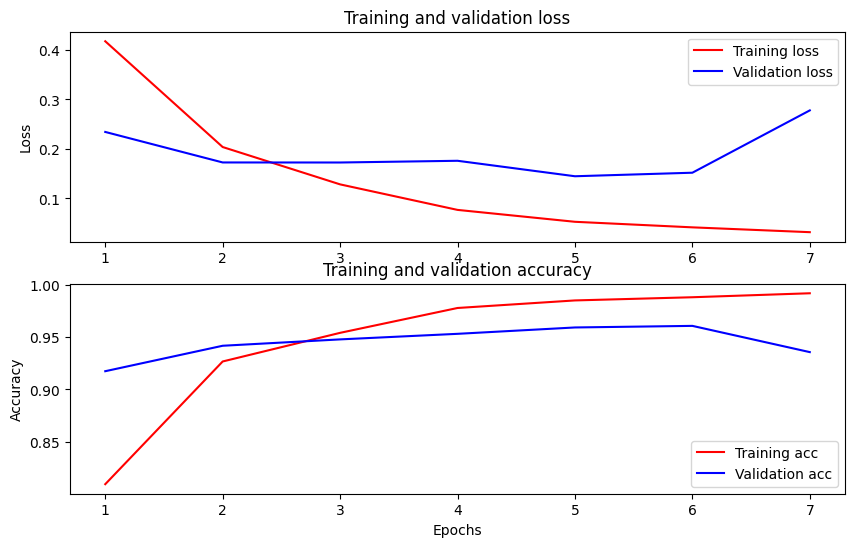

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss0= history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
y_predicted = model.predict(test_ds)
y_predicted = y_predicted.flatten()

104/104 [==============================] - 36s 342ms/step


In [ ]:
articles = [
    """There was a huge earthquake in California later today and the authorities are all working to save the innocent people"""
]

prediction = model.predict(articles)

# Interpret the prediction
if prediction > 0.5:
    print("The article headline: " + articles[0] + " is predicted to be a Breaking news")
else:
    print("The article headline: " + articles[0] + " is predicted to be a Non Breaking news")


1/1 [==============================] - 1s 522ms/step
The article headline: There was a huge earthquake in California later today and the authorities are all working to save the innocent people is predicted to be a Breaking news


In [ ]:
articles = [
     """Harry styles performed an awesome concert last night"""
]

prediction = model.predict(articles)

# Interpret the prediction
if prediction > 0.5:
    print("The article headline: " + articles[0] + " is predicted to be a Breaking news")
else:
    print("The article headline: " + articles[0] + " is predicted to be a Non Breaking news")


1/1 [==============================] - 0s 62ms/step
The article headline: Harry styles performed an awesome concert last night is predicted to be a Non Breaking news


In [ ]:
articles = [
     """Two teachers injured in Welsh school stabbing say it's "hard to comprehend" what happened and thank everyone for kind messages"""
]

# Predict the class label for the article
prediction = model.predict(articles)

# Interpret the prediction
if prediction > 0.5:
    print("The article headline: " + articles[0] + " is predicted to be a Breaking news")
else:
    print("The article headline: " + articles[0] + " is predicted to be a Non Breaking news")


1/1 [==============================] - 0s 62ms/step
The article headline: Two teachers injured in Welsh school stabbing say it's "hard to comprehend" what happened and thank everyone for kind messages is predicted to be a Breaking news


In [ ]:
articles = [
     """Top US diplomat Antony Blinken meets China's President Xi Jinping as Beijing warns against crossing red lines"""
]

prediction = model.predict(articles)

# Interpret the prediction
if prediction > 0.5:
    print("The article headline: " + articles[0] + " is predicted to be a Breaking news")
else:
    print("The article headline: " + articles[0] + " is predicted to be a Non Breaking news")


1/1 [==============================] - 0s 63ms/step
The article headline: Top US diplomat Antony Blinken meets China's President Xi Jinping as Beijing warns against crossing red lines is predicted to be a Breaking news


In [ ]:
articles = [
     """Girl, 13, charged with three counts of attempted murder after two teachers and a pupil were stabbed at a school in south-west Wales"""
]

prediction = model.predict(articles)

# Interpret the prediction
if prediction > 0.5:
    print("The article headline: " + articles[0] + " is predicted to be a Breaking news")
else:
    print("The article headline: " + articles[0] + " is predicted to be a Non Breaking news")


1/1 [==============================] - 0s 63ms/step
The article headline: Girl, 13, charged with three counts of attempted murder after two teachers and a pupil were stabbed at a school in south-west Wales is predicted to be a Breaking news


In [ ]:
articles = [
     """Uncovering ways to prepare climate-conscious meals at home."""
]


prediction = model.predict(articles)

# Interpret the prediction
if prediction > 0.5:
    print("The article headline: " + articles[0] + " is predicted to be a Breaking news")
else:
    print("The article headline: " + articles[0] + " is predicted to be a Non Breaking news")


1/1 [==============================] - 0s 62ms/step
The article headline: Uncovering ways to prepare climate-conscious meals at home. is predicted to be a Non Breaking news


In [ ]:
articles = [
     """GMA Lifestyle contributor Lori Bergamotto shows us some eco-friendly products you can use at home."""
]


prediction = model.predict(articles)

# Interpret the prediction
if prediction > 0.5:
    print("The article headline: " + articles[0] + " is predicted to be a Breaking news")
else:
    print("The article headline: " + articles[0] + " is predicted to be a Non Breaking news")


1/1 [==============================] - 0s 67ms/step
The article headline: GMA Lifestyle contributor Lori Bergamotto shows us some eco-friendly products you can use at home. is predicted to be a Non Breaking news


In [ ]:
articles = [
     """These are the countries where TikTok is already banned"""
]


prediction = model.predict(articles)

# Interpret the prediction
if prediction > 0.5:
    print("The article headline: " + articles[0] + " is predicted to be a Breaking news")
else:
    print("The article headline: " + articles[0] + " is predicted to be a Non Breaking news")


1/1 [==============================] - 0s 63ms/step
The article headline: These are the countries where TikTok is already banned is predicted to be a Non Breaking news


In [ ]:
articles = [
     """From now and on Gaza set to be free"""
]


prediction = model.predict(articles)

# Interpret the prediction
if prediction > 0.5:
    print("The article headline: " + articles[0] + " is predicted to be a Breaking news")
else:
    print("The article headline: " + articles[0] + " is predicted to be a Non Breaking news")


1/1 [==============================] - 0s 71ms/step
The article headline: From now and on Gaza set to be free is predicted to be a Breaking news


104/104 [==============================] - 36s 346ms/step
Confusion Matrix:
[[649  44]
 [ 48 908]]


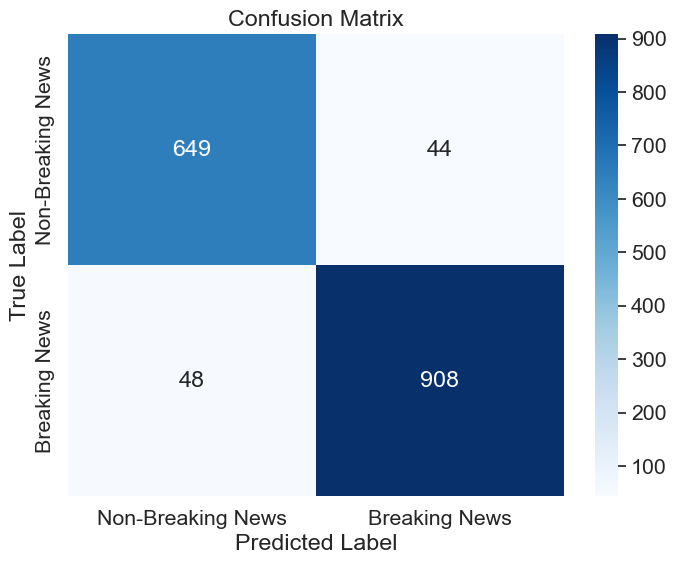

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
y_pred = model.predict(test_ds)
y_pred_binary = (y_pred > 0.5).astype(int)
y_true = test_data['label_num'].values

confusion_matrix = tf.math.confusion_matrix(y_true, y_pred_binary)
confusion_matrix_np = confusion_matrix.numpy()
print("Confusion Matrix:")
print(confusion_matrix_np)
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred_binary)
confusion_matrix_np = confusion_matrix.numpy()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Adjust font scale
sns.heatmap(confusion_matrix_np, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Breaking News', 'Breaking News'],
            yticklabels=['Non-Breaking News', 'Breaking News'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Save the trained model
model.save("FullFilment_TC/BertModel/bert_model.h5")

In [ ]:
# Load the saved model for prediction
loaded_model = tf.keras.models.load_model("FullFilment_TC/BertModel/bert_model.h5", custom_objects={'KerasLayer': hub.KerasLayer})
